<a href="https://colab.research.google.com/github/arifin220195/student-score-ml-regression/blob/main/student_score_ml_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load dataset student_scores.csv
ds = pd.read_csv("/content/drive/MyDrive/dibimbing/assignment/student_scores.csv")

# Lihat 5 data teratas
ds.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None

=== Statistik Deskriptif ===
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

=== Distribusi Jam Belajar ===
Hours
2.5    2
2.7    2
5.1    1
8.5    1
3.5    1
1.5    1
3.2    1
9.2    1
5.5    1
8.3    1
7.7    1
5.9    1
4.5    1
3.3    1
1.1    1
8.9    1
1.9    1
6.1    1
7.4    1
4.8    1
3.8    1
6.9    1
7.8    1
Name: count, dtype: int64

=== Distribusi Jam Belajar Dengan Barplot ===


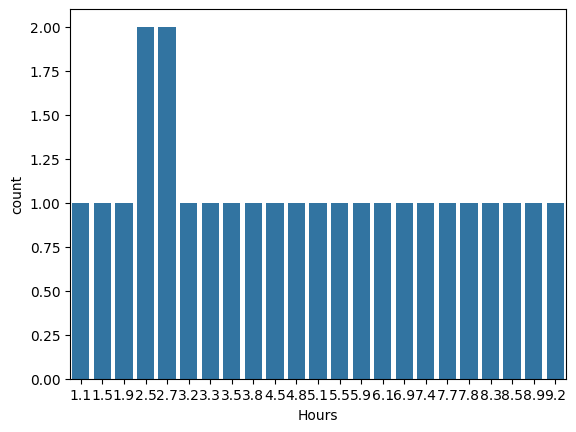

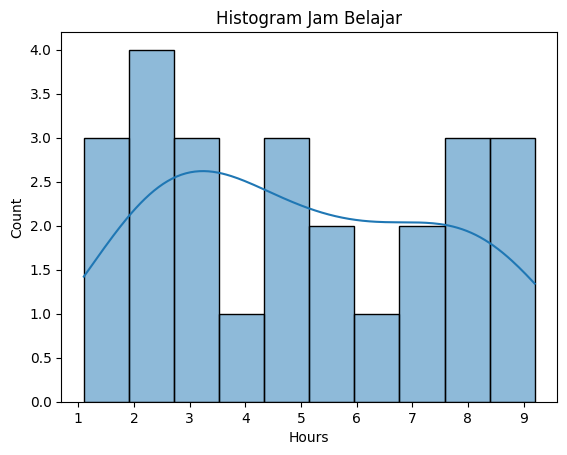

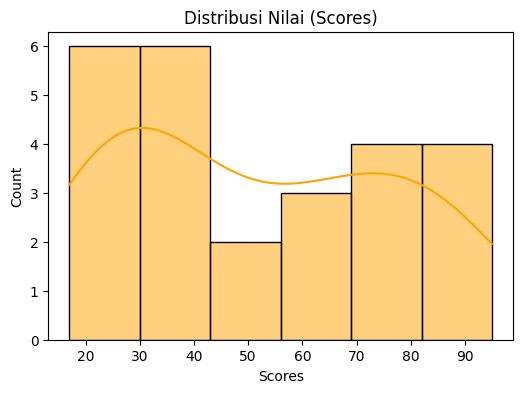

In [15]:
print("=== Info Dataset ===")
print(ds.info())

print("\n=== Statistik Deskriptif ===")
print(ds.describe())

print("\n=== Distribusi Jam Belajar ===")
print(ds['Hours'].value_counts())

print("\n=== Distribusi Jam Belajar Dengan Barplot ===")
sns.countplot(x='Hours', data=ds)
plt.show()

# Contoh histogram Hours dengan bins diset
sns.histplot(ds['Hours'], bins=10, kde=True)
plt.title("Histogram Jam Belajar")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.show()

# Histogram distribusi Scores
plt.figure(figsize=(6,4))
sns.histplot(ds['Scores'], bins=6, kde=True, color="orange")
plt.title("Distribusi Nilai (Scores)")
plt.xlabel("Scores")
plt.ylabel("Count")
plt.show()



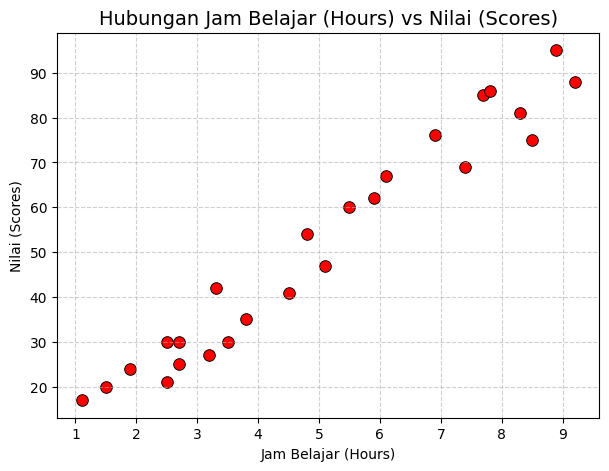

In [16]:
# Scatter plot Hours vs Scores
plt.figure(figsize=(7,5))
sns.scatterplot(x="Hours", y="Scores", data=ds, color="red", s=70, edgecolor="black")
plt.title("Hubungan Jam Belajar (Hours) vs Nilai (Scores)", fontsize=14)
plt.xlabel("Jam Belajar (Hours)")
plt.ylabel("Nilai (Scores)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Correlation matrix:
           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


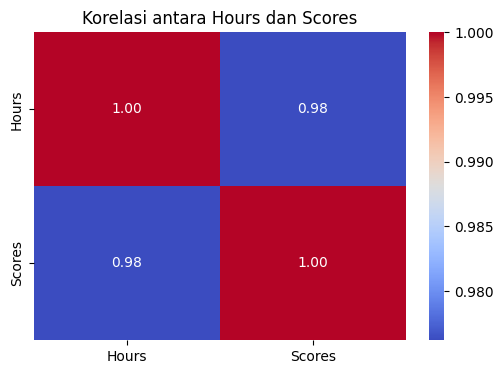

In [20]:
# Hitung korelasi
correlation = ds.corr()
print("Correlation matrix:")
print(correlation)

# Visualisasi dengan heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antara Hours dan Scores")
plt.show()



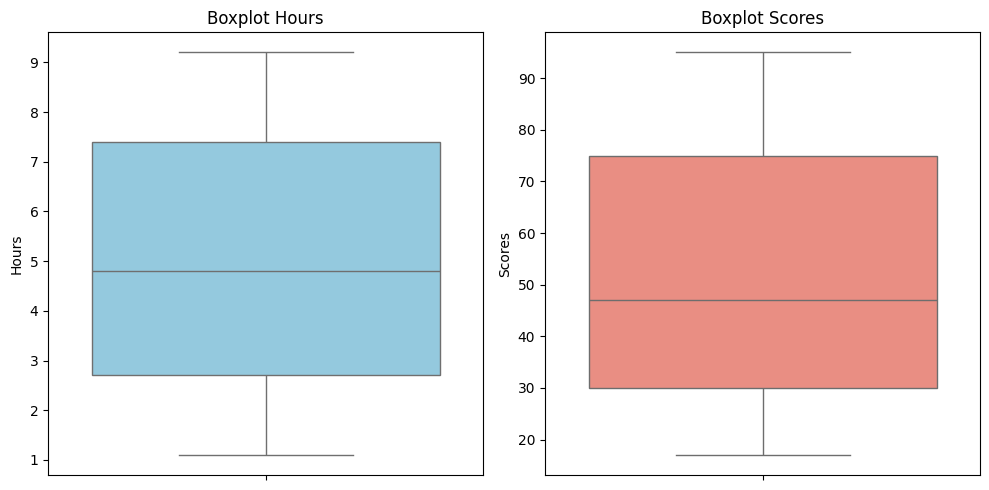

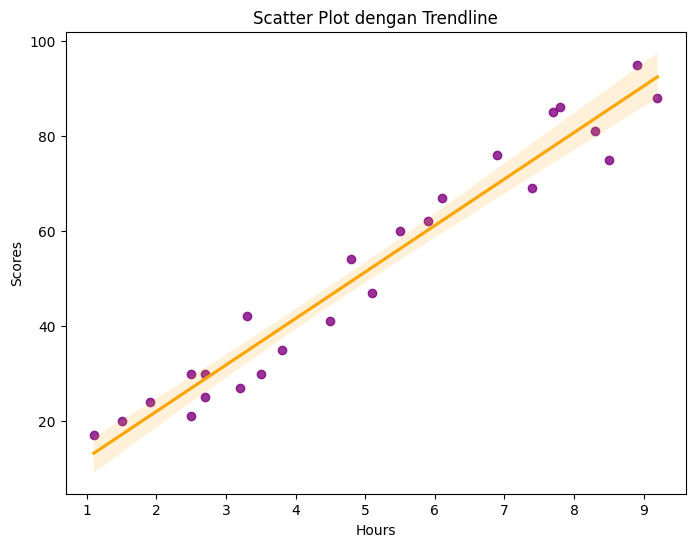

In [21]:
# Boxplot untuk Hours dan Scores
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=ds['Hours'], color="skyblue")
plt.title("Boxplot Hours")

plt.subplot(1, 2, 2)
sns.boxplot(y=ds['Scores'], color="salmon")
plt.title("Boxplot Scores")

plt.tight_layout()
plt.show()


# Scatter plot dengan trendline
plt.figure(figsize=(8, 6))
sns.regplot(x="Hours", y="Scores", data=ds, color="purple", line_kws={"color": "orange"})
plt.title("Scatter Plot dengan Trendline")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


Selain scatter plot & correlation matrix, ada beberapa cara untuk melihat pola data sebelum kita modeling. Misalnya:

Histogram
→ Untuk lihat distribusi tiap fitur (Hours & Scores). Apakah normal, miring ke kiri/kanan, dll.

Boxplot
→ Untuk cek sebaran nilai dan outlier. Misalnya ada mahasiswa belajar 50 jam tapi skornya 20 (aneh banget), bisa langsung ketahuan.

Pairplot (kalau fitur lebih dari 2)
→ Cocok kalau dataset besar, bisa lihat hubungan antar fitur sekaligus.

Trend line (regression line)
→ Scatter plot + garis regresi sederhana, buat lihat tren awal.

Jadi “visualisasi lain” ini lebih ke memperkaya EDA (Exploratory Data Analysis) sebelum kita cleaning atau modeling.


Memang benar: kalau fiturnya cuma 2 (Hours & Scores), ya informasi dasarnya tetap itu–itu saja.

Tapi perbedaan ada di cara melihat pola:

Histogram kasih gambaran distribusi (apakah condong, normal, dsb).

Scatter plot kasih gambaran hubungan antar fitur (Hours vs Scores).

Boxplot kasih gambaran sebaran + deteksi outlier.

Correlation matrix kasih angka seberapa kuat hubungan.

Trend line kasih sense “kira-kira model linear bakal cocok apa nggak”.

➡️ Jadi walau fiturnya sama, tiap visualisasi menyajikan sudut pandang berbeda, ibarat kamu lihat satu objek tapi dari sisi depan, samping, atas. Hasilnya bisa bikin kita lebih yakin apakah:

Data “bersih” atau ada anomali,

Pola hubungannya linear atau ada keanehan,

Model sederhana (linear regression) udah cukup, atau harus coba pendekatan lain.

📌 Intinya: iya, insight bisa lebih dalam meski fiturnya sama, karena visualisasi = cara pandang berbeda.

Kalau kita pakai dataset Hours vs Scores, kita bisa coba:

Boxplot
→ Untuk lihat sebaran (median, kuartil) & deteksi outlier secara visual.

Angle: apakah ada nilai ekstrim yang bisa ganggu model?

Scatter plot + trendline
→ Untuk lihat hubungan linear secara lebih jelas.

Angle: apakah benar-benar linear atau ada pola aneh?

Pairplot (opsional)
→ Kalau fitur lebih banyak, ini berguna. Di kasus kita, cuma 2 fitur, jadi sederhana.

Angle: konfirmasi hubungan antar fitur secara cepat.

📊 Jadi nanti kita bisa compare:

Histogram → distribusi tiap fitur,

Boxplot → potret ringkas + outlier,

Scatter + trendline → kekuatan hubungan linear,

Correlation matrix → angka korelasinya.

# **📊 Boxplot Hours**

Median (garis hitam di dalam box) ada di sekitar 4.8 jam → berarti setengah siswa belajar kurang dari ini, setengahnya lebih.

Rentang interkuartil (IQR, area box) sekitar 2.8 – 7.5 jam → mayoritas siswa belajar dalam range ini.

Tidak terlihat outlier mencolok → jam belajar relatif konsisten.

# **📊 Boxplot Scores**

Median nilai ada di sekitar 47 → setengah siswa mendapat nilai di bawah ini, setengahnya di atas.

Sebaran nilai cukup lebar: dari ~17 sampai 95 → variasi pencapaian besar sekali.

Tidak tampak outlier ekstrim → semua nilai masih dalam batas wajar.

# **👉 Insight awal:**

Walau jam belajar relatif “terpusat” (kebanyakan 3–7 jam), nilai siswa lebih bervariasi.

Ini mendukung bahwa Hours memang berpengaruh, tapi ada faktor lain di balik variasi nilai.

# **📦 Boxplot Hours (Jam Belajar)**

Median (garis di tengah kotak): sekitar 4,8 jam → ini rata-rata/posisi tengah jam belajar siswa.

IQR (kotak): mayoritas siswa belajar antara ~2,8 jam sampai ~7,5 jam.

Whiskers (garis atas/bawah): data terendah sekitar 1 jam, tertinggi sekitar 9 jam.

Outlier: tidak terlihat ada outlier → artinya distribusi jam belajar relatif rapi.

**👉 Insight: siswa paling banyak belajar di rentang 3–7 jam, yang bisa dianggap sebagai "jam belajar wajar".**

**📦 Boxplot Scores (Nilai)**

Median: sekitar 47 → separuh siswa punya nilai ≤47.

IQR: mayoritas nilai ada di antara ~30 sampai ~75.

Whiskers: nilai terendah sekitar 17, tertinggi sekitar 95.

Outlier: tidak ada nilai ekstrem yang jauh di luar range → dataset cukup bersih.

**👉 Insight: distribusi nilai lebih lebar dibanding jam belajar. Ada siswa yang belajar sedikit tapi nilainya tetap rendah, sementara yang belajar lebih banyak cenderung dapat nilai tinggi (kita lihat ini lebih jelas di scatter plot sebelumnya).**

**💡 Jadi dengan boxplot ini, kita dapat perspektif tambahan:**

Jam belajar relatif konsisten (tidak ada jam ekstrem).

Nilai siswa lebih variatif (rentang lebar), tapi tetap tidak ada outlier mencurigakan.

# **Interpretasi Trendline**

Trendline itu garis regresi linear yang coba "merangkum" hubungan antara Hours (jam belajar) dan Scores (nilai).

Dari scatter plot sebelumnya kita lihat titik-titik naik searah.

Trendline yang menanjak artinya semakin banyak jam belajar → semakin tinggi nilai ujian.

Kerapatan titik di sekitar garis menandakan hubungan yang kuat dan konsisten (tidak terlalu menyebar).

**Cara Membaca Trendline untuk Analisis**

Kalau garis fit-nya rapat dengan titik, model linear cocok.

Kalau banyak titik jauh dari garis, berarti ada noise/outlier atau hubungan tidak linear.

Koefisien slope
𝑏
b kasih insight tentang seberapa besar pengaruh jam belajar terhadap nilai.

Koefisien korelasi
𝑟
r atau
𝑅
2
R
2
 kasih tahu seberapa kuat model menjelaskan data (semakin mendekati 1, makin kuat).

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Pisahkan X (fitur) dan y (target)
X = ds[['Hours']]   # fitur: jam belajar
y = ds['Scores']    # target: nilai ujian

# Buat model
model = LinearRegression()

# Latih model
model.fit(X, y)

# Ambil slope (koefisien) dan intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Persamaan garis regresi: y = {intercept:.2f} + {slope:.2f} * x")

# Skor R^2 (berapa kuat model jelaskan data)
r2 = model.score(X, y)
print(f"R^2: {r2:.3f}")


Persamaan garis regresi: y = 2.48 + 9.78 * x
R^2: 0.953


**Berarti persamaan regresinya:**

Score
=
2.48
+
9.78
×
Hours
Score=2.48+9.78×Hours

**🔎 Interpretasi:**

Intercept 2.48 → kalau tidak belajar sama sekali (0 jam), prediksi nilai masih sekitar 2.48 (baseline nilai).

Slope 9.78 → setiap tambahan 1 jam belajar, nilai ujian diprediksi naik sekitar 9.78 poin.

R² = 0.953 → model linear ini bisa menjelaskan 95.3% variasi data → sangat kuat 👍.

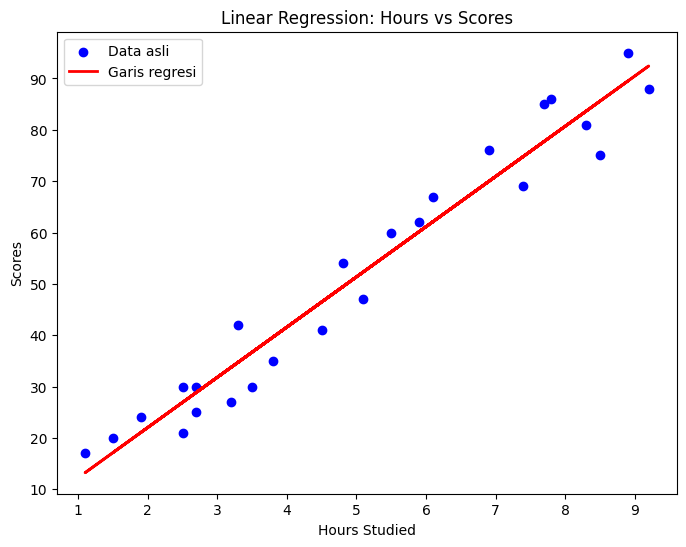

In [23]:
# Visualisasi scatter + garis regresi
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Data asli')

# Prediksi nilai berdasarkan jam belajar
y_pred = model.predict(X)

# Garis regresi
plt.plot(X, y_pred, color='red', linewidth=2, label='Garis regresi')

plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Linear Regression: Hours vs Scores")
plt.legend()
plt.show()


In [25]:
# # Jam belajar tertentu
# jam_belajar = np.array([[5], [9], [12]])

# # Prediksi nilai
# prediksi_scores = model.predict(jam_belajar)

# # Tampilkan hasil
# for jam, nilai in zip(jam_belajar.flatten(), prediksi_scores):
#     print(f"Jika belajar {jam} jam → prediksi nilai = {nilai:.2f}")

# Input sebagai DataFrame biar sesuai dengan feature names
jam_belajar_df = pd.DataFrame({'Hours': [5, 9, 12]})
prediksi_scores = model.predict(jam_belajar_df)

for jam, nilai in zip(jam_belajar_df['Hours'], prediksi_scores):
    print(f"Jika belajar {jam} jam → prediksi nilai = {nilai:.2f}")



Jika belajar 5 jam → prediksi nilai = 51.36
Jika belajar 9 jam → prediksi nilai = 90.47
Jika belajar 12 jam → prediksi nilai = 119.79


In [27]:
# Cek jumlah missing value per kolom
print(ds.isnull().sum())

# Cek duplikasi baris
print(f"Jumlah data duplikat: {ds.duplicated().sum()}")


Hours     0
Scores    0
dtype: int64
Jumlah data duplikat: 0


In [28]:
# 1. Split data (80% train, 20% test)
X = ds[['Hours']]
y = ds['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# 3. Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 4. Print hasil evaluasi
print("Linear Regression → MSE:", mse_lin, " R²:", r2_lin)
print("Random Forest Regressor → MSE:", mse_rf, " R²:", r2_rf)

Linear Regression → MSE: 18.943211722315272  R²: 0.9678055545167994
Random Forest Regressor → MSE: 13.045153611111104  R²: 0.9778294466160586


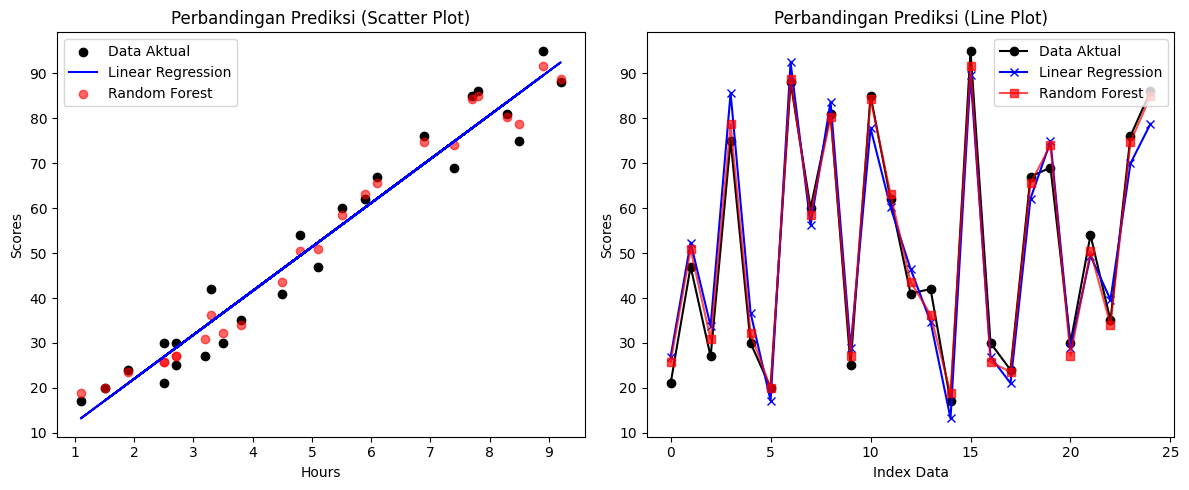

In [29]:
# Inisialisasi model
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42, n_estimators=100)

# Pisahkan X (fitur) dan y (target)
X = ds[['Hours']]
y = ds['Scores']

# Fit model ke data
lr.fit(X, y)
rf.fit(X, y)

# Prediksi dari kedua model
y_pred_lr = lr.predict(X)   # Linear Regression
y_pred_rf = rf.predict(X)   # Random Forest

# 1. Scatter Plot: Hours vs Scores
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X, y, color="black", label="Data Aktual")
plt.plot(X, y_pred_lr, color="blue", label="Linear Regression")
plt.scatter(X, y_pred_rf, color="red", alpha=0.6, label="Random Forest")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Perbandingan Prediksi (Scatter Plot)")
plt.legend()

# 2. Line Plot: Index data vs Scores
plt.subplot(1,2,2)
plt.plot(range(len(y)), y, label="Data Aktual", color="black", marker="o")
plt.plot(range(len(y_pred_lr)), y_pred_lr, label="Linear Regression", color="blue", marker="x")
plt.plot(range(len(y_pred_rf)), y_pred_rf, label="Random Forest", color="red", marker="s", alpha=0.7)
plt.xlabel("Index Data")
plt.ylabel("Scores")
plt.title("Perbandingan Prediksi (Line Plot)")
plt.legend()

plt.tight_layout()
plt.show()
